
# A demo of the Spectral Biclustering algorithm

This example demonstrates how to generate a checkerboard dataset and bicluster
it using the :class:`~sklearn.cluster.SpectralBiclustering` algorithm. The
spectral biclustering algorithm is specifically designed to cluster data by
simultaneously considering both the rows (samples) and columns (features) of a
matrix. It aims to identify patterns not only between samples but also within
subsets of samples, allowing for the detection of localized structure within the
data. This makes spectral biclustering particularly well-suited for datasets
where the order or arrangement of features is fixed, such as in images, time
series, or genomes.

The data is generated, then shuffled and passed to the spectral biclustering
algorithm. The rows and columns of the shuffled matrix are then rearranged to
plot the biclusters found.


In [ ]:
# Author: Kemal Eren <kemal@kemaleren.com>
# License: BSD 3 clause

## Generate sample data
We generate the sample data using the
:func:`~sklearn.datasets.make_checkerboard` function. Each pixel within
`shape=(300, 300)` represents with it's color a value from a uniform
distribution. The noise is added from a normal distribution, where the value
chosen for `noise` is the standard deviation.

As you can see, the data is distributed over 12 cluster cells and is
relatively well distinguishable.



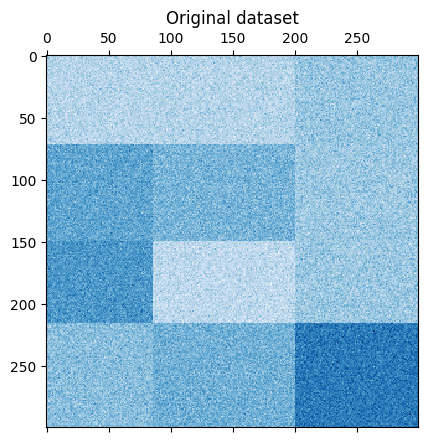

In [41]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.datasets import make_checkerboard

n_clusters = (4, 3)
data, rows, columns = make_checkerboard(
    shape=(300, 300), n_clusters=n_clusters, noise=10, shuffle=False, random_state=42
)
#data = np.random.rand(300,300) #< This will give a matshow that looks like tv static
plt.matshow(data, cmap=plt.cm.Blues) #Display an array as a matrix in a new figure window.
plt.title("Original dataset")
_ = plt.show()

In [42]:
#Just playing around with the generated data from above
print("Shape of rows:",rows.shape)  #<---- This shows 12 clusters for 300 rows
print("Shape of columns:",columns.shape) #<---- This shows 12 clusters for 300 rows
print(rows[0,:]) #Does cluster 0 belong a particular row (Yes upto 75 rows for cluster 0,1 and 2

Shape of rows: (12, 300)
Shape of columns: (12, 300)
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False Fals

We shuffle the data and the goal is to reconstruct it afterwards using
:class:`~sklearn.cluster.SpectralBiclustering`.



In [43]:
import numpy as np

# Creating lists of shuffled row and column indices
rng = np.random.RandomState(0)
row_idx_shuffled = rng.permutation(data.shape[0])
col_idx_shuffled = rng.permutation(data.shape[1])

We redefine the shuffled data and plot it. We observe that we lost the
structure of original data matrix.



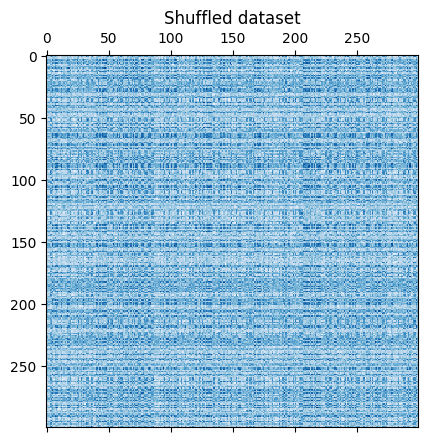

In [44]:
data = data[row_idx_shuffled][:, col_idx_shuffled]

plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Shuffled dataset")
_ = plt.show()

## Fitting `SpectralBiclustering`
We fit the model and compare the obtained clusters with the ground truth. Note
that when creating the model we specify the same number of clusters that we
used to create the dataset (`n_clusters = (4, 3)`), which will contribute to
obtain a good result.



In [45]:
from sklearn.cluster import SpectralBiclustering
from sklearn.metrics import consensus_score

model = SpectralBiclustering(n_clusters=n_clusters, method="log", random_state=0)
model.fit(data)

# Compute the similarity of two sets of biclusters
score = consensus_score(
    model.biclusters_, (rows[:, row_idx_shuffled], columns[:, col_idx_shuffled])
)
print(f"consensus score: {score:.1f}")

consensus score: 1.0


The score is between 0 and 1, where 1 corresponds to a perfect matching. It
shows the quality of the biclustering.



## Plotting results
Now, we rearrange the data based on the row and column labels assigned by the
:class:`~sklearn.cluster.SpectralBiclustering` model in ascending order and
plot again. The `row_labels_` range from 0 to 3, while the `column_labels_`
range from 0 to 2, representing a total of 4 clusters per row and 3 clusters
per column.



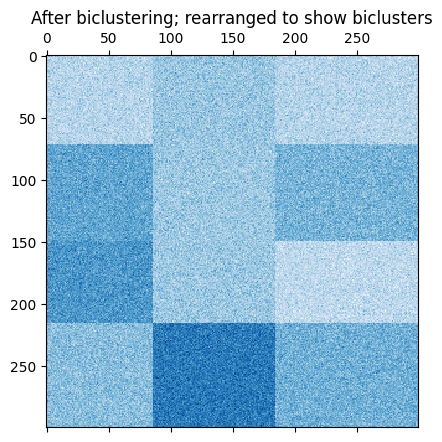

In [46]:
# Reordering first the rows and then the columns.
reordered_rows = data[np.argsort(model.row_labels_)]
reordered_data = reordered_rows[:, np.argsort(model.column_labels_)]

plt.matshow(reordered_data, cmap=plt.cm.Blues)
plt.title("After biclustering; rearranged to show biclusters")
_ = plt.show()

As a last step, we want to demonstrate the relationships between the row
and column labels assigned by the model. Therefore, we create a grid with
:func:`numpy.outer`, which takes the sorted `row_labels_` and `column_labels_`
and adds 1 to each to ensure that the labels start from 1 instead of 0 for
better visualization.



In [ ]:
plt.matshow(
    np.outer(np.sort(model.row_labels_) + 1, np.sort(model.column_labels_) + 1),
    cmap=plt.cm.Blues,
)
plt.title("Checkerboard structure of rearranged data")
plt.show()

The outer product of the row and column label vectors shows a representation
of the checkerboard structure, where different combinations of row and column
labels are represented by different shades of blue.

